In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime
import timeit

2023-08-06 10:29:56.268983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 10:29:56.317583: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 10:29:56.318689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 10:30:03.496994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# model.fit(x_train, y_train, epochs=5)
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

model.evaluate(x_test, y_test)

2023-08-06 10:30:21.758355: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1859/1875 [============================>.] - ETA: 0s - loss: 0.3002 - accuracy: 0.9118

2023-08-06 10:32:04.556279: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2023-08-06 10:32:08.587554: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24084480 exceeds 10% of free system memory.


1875/1875 [==============================] - 90s 7ms/step - loss: 0.2992 - accuracy: 0.9120 - val_loss: 0.1422 - val_accuracy: 0.9582
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1432 - accuracy: 0.9569 - val_loss: 0.1021 - val_accuracy: 0.9687
Epoch 3/5
  33/1875 [..............................] - ETA: 5s - loss: 0.1048 - accuracy: 0.9650

2023-08-06 10:32:16.860708: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24084480 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.1089 - accuracy: 0.9661 - val_loss: 0.0862 - val_accuracy: 0.9743
Epoch 4/5
  31/1875 [..............................] - ETA: 6s - loss: 0.0826 - accuracy: 0.9768

2023-08-06 10:32:23.912323: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24084480 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0901 - accuracy: 0.9728 - val_loss: 0.0817 - val_accuracy: 0.9749
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9767


[0.07522785663604736, 0.9767000079154968]

In [7]:
print(tf.__version__)

2.13.0


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
len(y_train)

60000

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

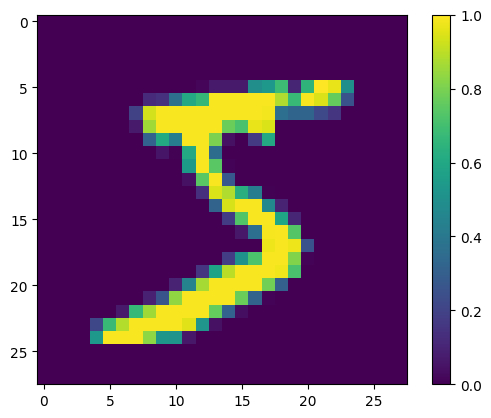

In [11]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']


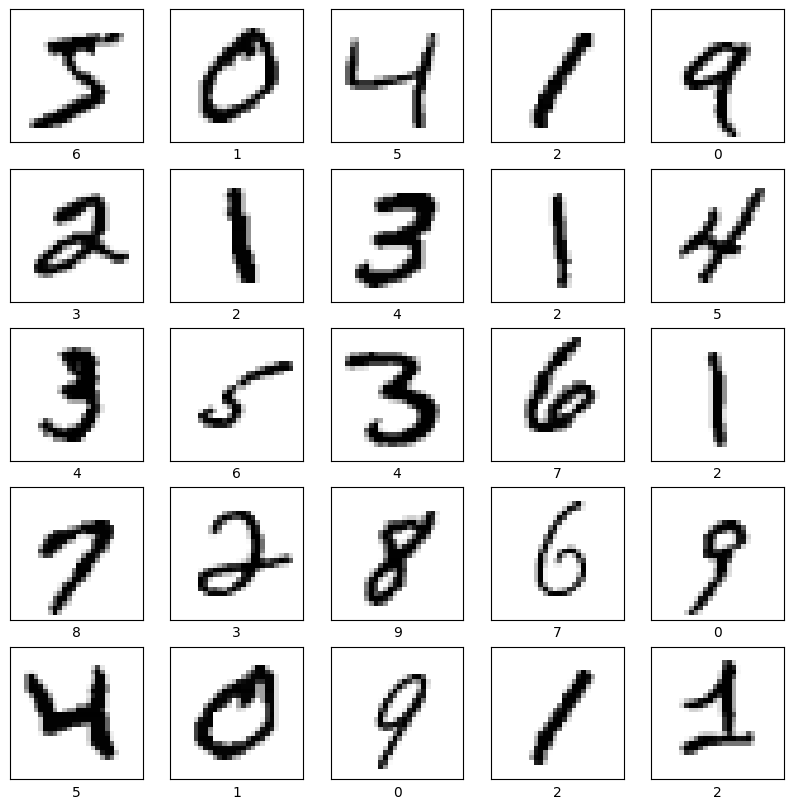

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [14]:
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
  tf.config.experimental.set_memory_growth(device, True)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
models_dir = r'./models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [17]:
model.save(models_dir + '/mnist_model')

INFO:tensorflow:Assets written to: ./models/mnist_model/assets


INFO:tensorflow:Assets written to: ./models/mnist_model/assets


(Tensorflow guide)[https://www.tensorflow.org/guide/data]

In [18]:
%load_ext tensorboard

In [19]:
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-08-06 10:33:41.865737: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 10:33:46.448047: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 10:33:46.463524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 10:33:58.497488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Po